<a href="https://colab.research.google.com/github/AshmithaMB/EmployeeChurn/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**  : Employee Attrition Prediction

**Introduction:**
The goal of this project is to analyze employee data from an organization and predict whether an employee is likely to leave the organization or not. The prediction will be based on various parameters such as salary, promotion, satisfaction level, department, and more. By identifying employees at risk of attrition, the organization can take proactive measures to retain valuable talent and minimize the negative impact of employee turnover.

**Dataset:**
The dataset provided contains information about the organization's employees, including both employees who have left (attrited) and those who are currently employed. The dataset includes the following columns:

* satisfaction_level: A measure of employee satisfaction, ranging from 0 to 1.
* last_evaluation: The result of the employee's most recent performance evaluation, ranging from 0 to 1.
* number_project: The number of projects the employee has worked on.
* average_montly_hours: The average number of monthly working hours for the employee.
* time_spend_company: The number of years the employee has spent in the company.
* Work_accident: An indicator (0 or 1) of whether the employee has experienced a work accident.
* left: The target variable indicating whether the employee has left the organization (1) or not (0).
* promotion_last_5years: An indicator (0 or 1) of whether the employee has been promoted in the last 5 years.
* Department: The department in which the employee works.
* salary: The salary level of the employee.

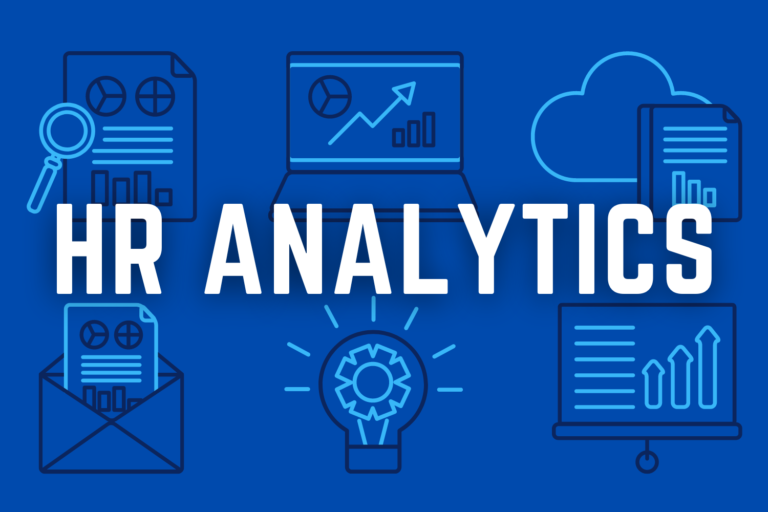

### Contents

**1. DataSet Import**

**2. Importing Libraries**

**3. Feature Engineering**
   * Data Preprocessing
   * Numerical Features
   * Categorical Features
   * Typecasting
   * Scaling

**4. Exploratory Data Analysis**

**5. Model Building**

* **Logistic Regression**
* **SVM**
* **Decision Tree Classifier**
* **Bagging Ensemble**
  * Random Forest
* **Boosting Ensemble**
  * AdaBoost
  * Gradient Boost
  * XGBoost

In [1]:
# Feature Engineering
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("/content/HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Understanding the Data


`satisfaction_level`               -     Satisfaction Level

`last_evaluation`              -        Last Appraisal of the Employee's Performance

`number_project` -         Number of Projects Worken on

`average_montly_hours` -   Monthly Average Work Hours

`time_spend_company` -     Time spent in the Company

`Department` -             Departments in the Company

`salary` -                 Remuneration (High/Medium/Low)
`left` -                   Left the Company or not

              `0 - NO`           `1 - YES`

`Work_accident` -          Casualty/Injury in the Workplace

`promotion_last_5years` -  Promotion in the Last 5 Years


In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


* Standard Deviation in `average_monthly_hours` is very high at 49.9 this indicates that there is a lot of variance in the observed data around the mean/second quartile.
* `time_spend_company` has a maximum time of 10 years but its second quartile (mean/50%) explains that 50% of the overall workforce has spent only 3 years in the company and its upper quartile(75%) shows that there is only 25% of the employees who spent more than 4 years.
* Some skewness/outliers can be expected as a result.

In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Dtypes are different, there are two categorical variables which need to be converted into numeric
* There are no null values, hence proceeding with exploratory data analysis

###EDA

####Distribution of the Departments

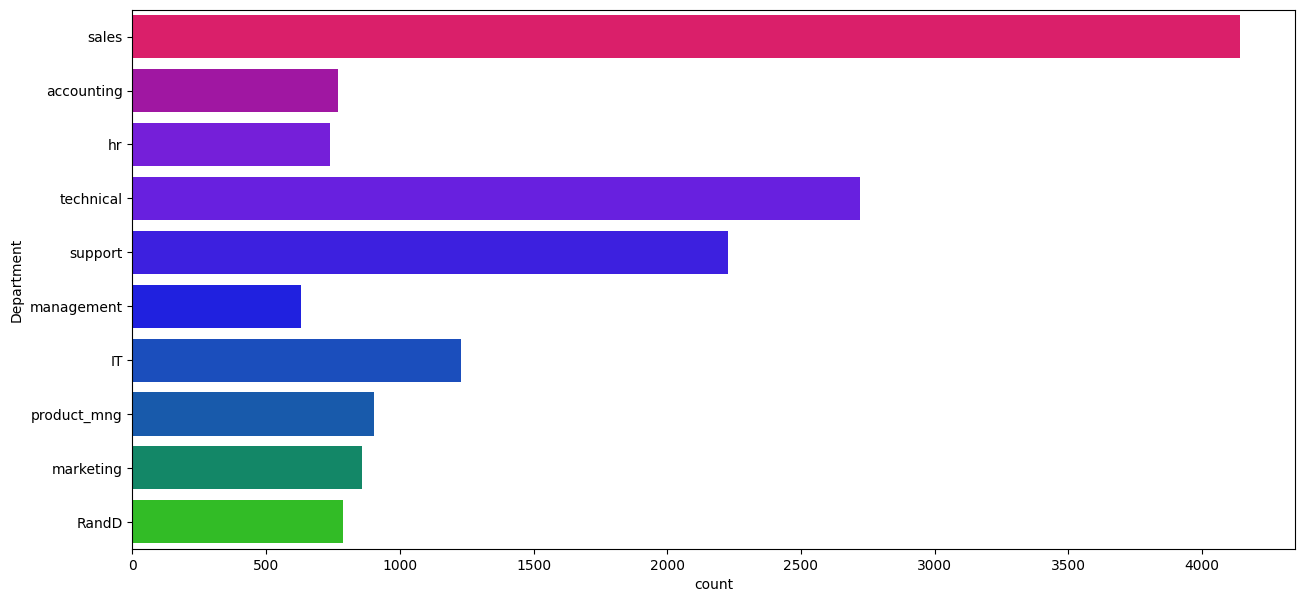

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(y='Department',palette='prism',data=data);

* Employees in Sales, Technical, Support, IT, Product Management, Marketing departments are twice as many in number when compared to Management, R&D, Accounting and HR this could mean that operational and management level employees are more in number than the strategic ones.

In [7]:
left_count = data.left.value_counts()
left_count

0    11428
1     3571
Name: left, dtype: int64

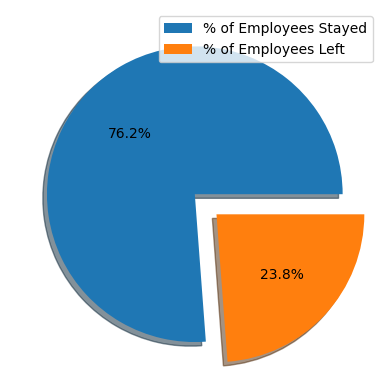

In [8]:
plt.pie(data.left.value_counts(), explode=[0,0.2],
        shadow=True,
        autopct="%1.1f%%")
plt.legend(labels=["% of Employees Stayed", "% of Employees Left"],loc='upper right')
plt.show()


* Employee Retention rate sums upto 76.2%. That means, the average employee turnover rate is 23.8%.
* In general, employee retention rate of 80% - 90% is considered to be good. Therefore, the company should look aim for an average employee turnover rate of 10% or less.


In [9]:
corr = data.corr()

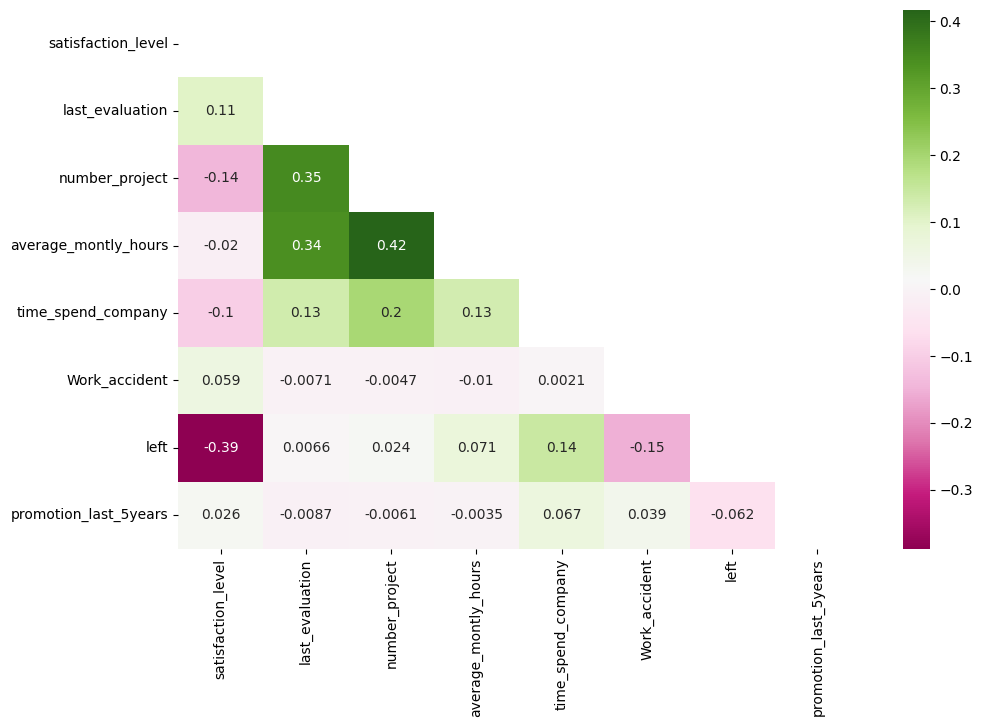

In [10]:
plt.figure(figsize=(11,7))
steps = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=steps, cmap="PiYG");

* It is clearly seen from the above heatmap that there is no correlation between `left` and other features except `satisfaction_level`.
* Employees' satisfaction level is very slightly negatively correlated with their turnover rate.
* Although chances for `number_project` and `average_montly_hours` to be multicollinear are inconsiderable.

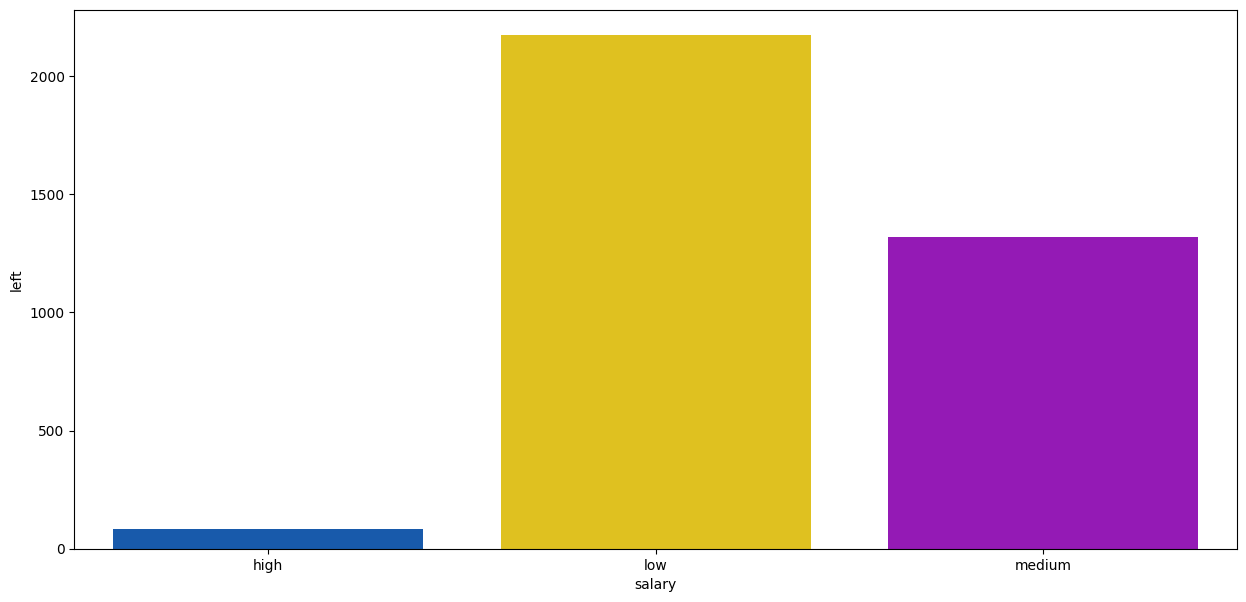

In [11]:
plt.figure(figsize=(15,7))
a = data.groupby(by = ['salary']).sum()
df = a.reset_index()
sns.barplot(data = df, x = 'salary', y = 'left', palette = 'prism');

* The low to medium range salaried employees tend to leave the company more frequently in comparision with high salaried ones; this could be because the strategic level employees (high salaried) are settled and content with the company unlike (low/medium) salaried ones and therefore this factor could behave as an outlier further.

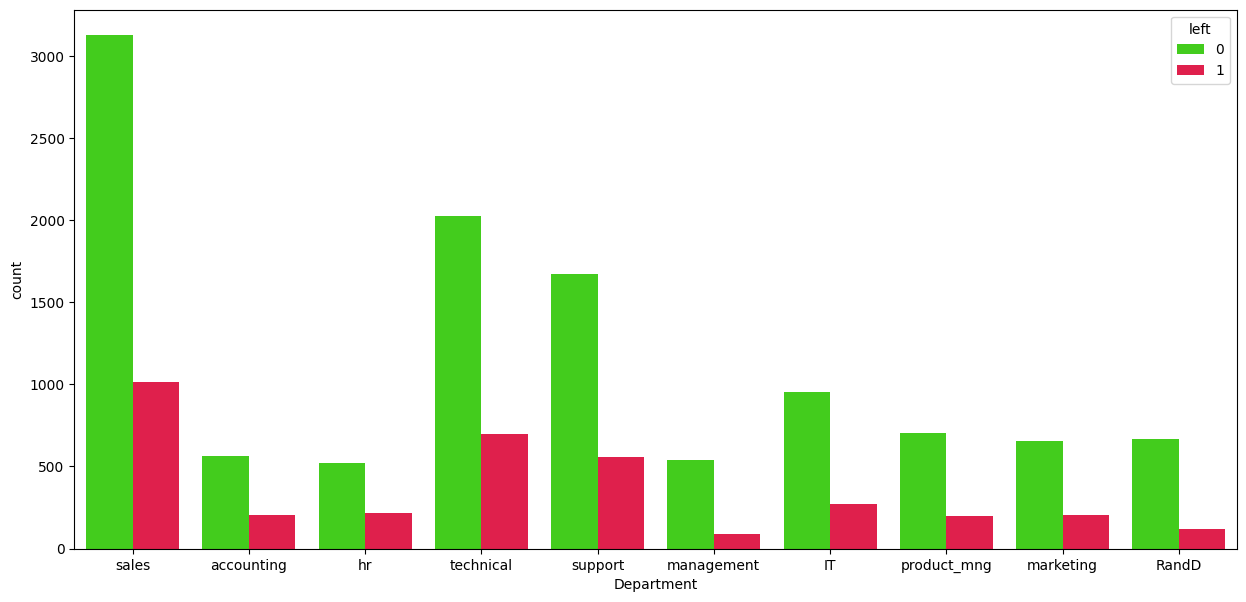

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x='Department',hue='left',palette='prism',data=data);

* Out of the total employees who left the company (3571) those who left from Sales, Technical and Support Departments sum up to more than 75% this could be because they are from the functional level of the organisation.

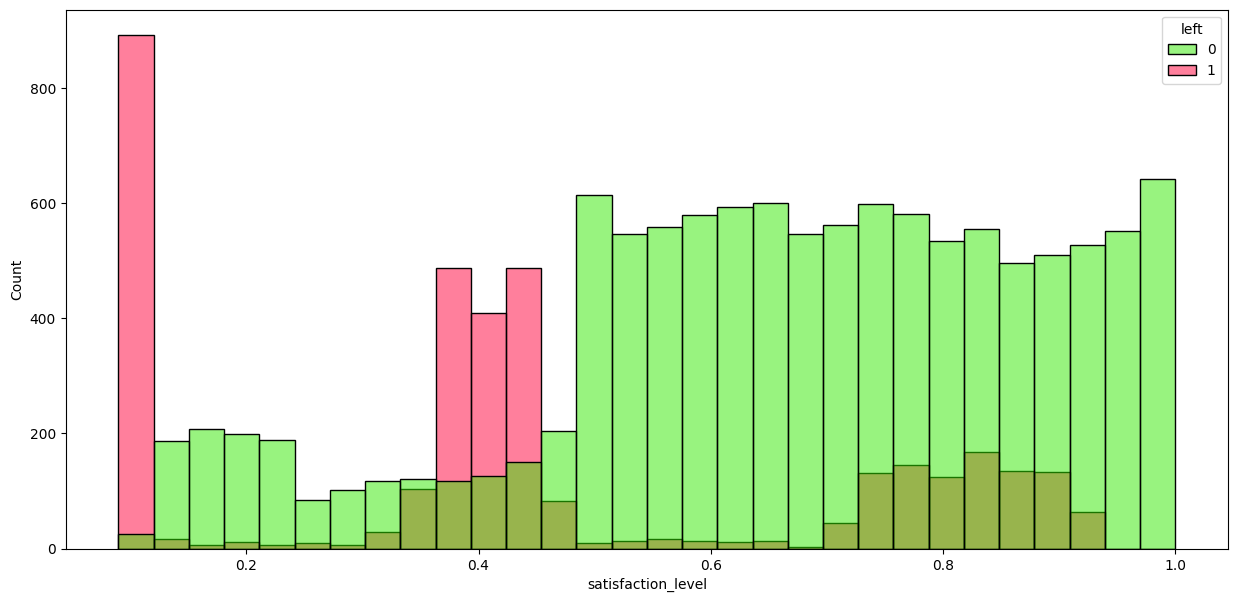

In [13]:
plt.figure(figsize=(15,7))
sns.histplot(data=data,x='satisfaction_level',hue='left', palette='prism');

* It is evident that employees who left the company were not really satisfied and employees who were satisfied didn't leave.

#### Converting categorical features into numerical

Salary
* 0 - High
* 1 - Low
* 2 - Medium

Departments
* 0 - IT
* 1 - RandD
* 2 - Accounting
* 3 - HR
* 4 - Management
* 5 - Marketing
* 6 - Product Management
* 7 - Sales
* 8 - Support
* 9 - Technical

In [14]:
le = preprocessing.LabelEncoder()
data['Salary'] = le.fit_transform(data['salary'])
data['Departments'] = le.fit_transform(data['Department'])

In [15]:
data = data.drop(['salary', 'Department'], axis = 1)

In [16]:
print(le.classes_)

['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']


In [17]:
data.Departments.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

Checking the Skewness

In [18]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Salary                     int64
Departments                int64
dtype: object

In [19]:
for col in data.columns:
    if data[col].dtype == 'int64':
        data[col] = data[col].astype('float64')

In [20]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                     float64
promotion_last_5years    float64
Salary                   float64
Departments              float64
dtype: object

In [21]:
numerical = []
for i in data.columns:
    if data[i][0].dtype == 'float64':
        numerical.append(i)

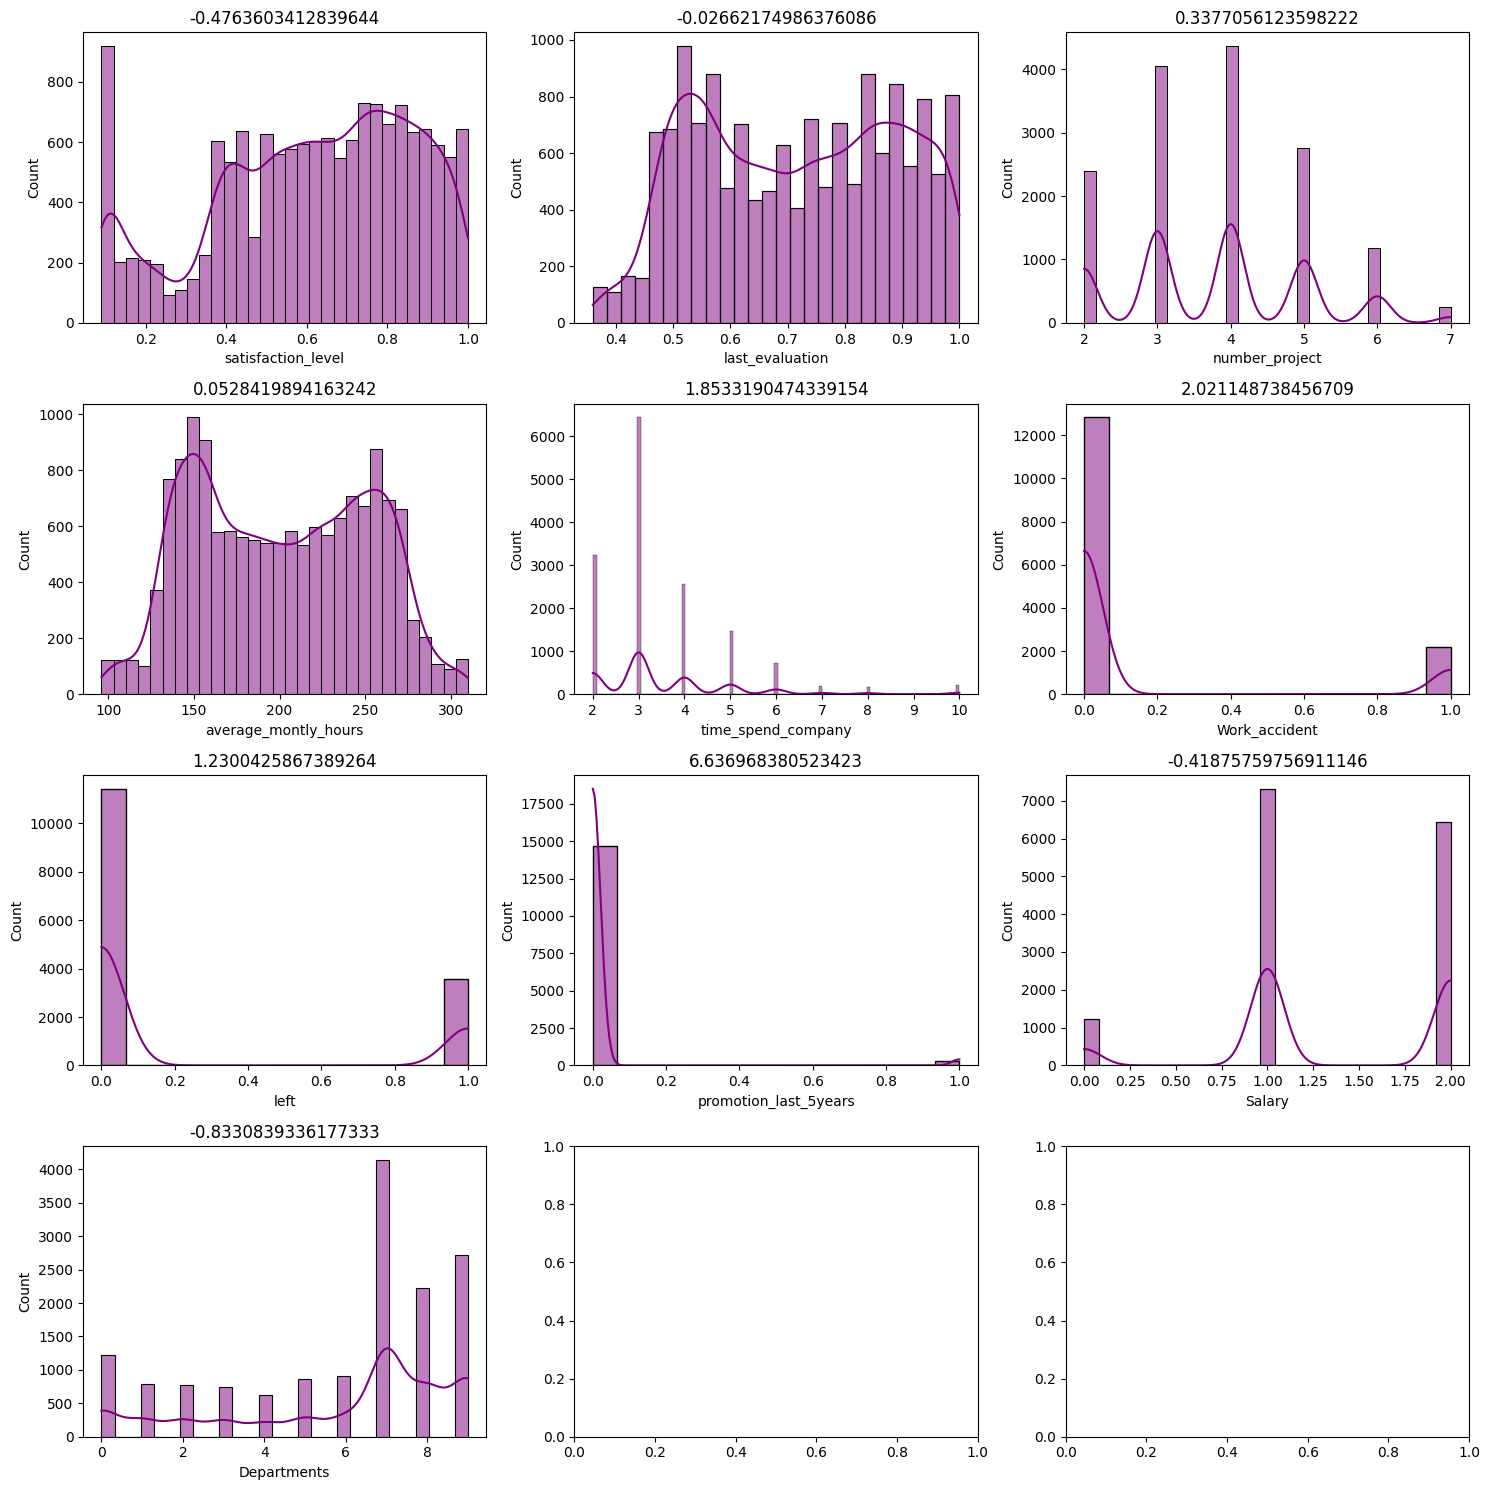

In [22]:
fig , ax = plt.subplots(4,3, figsize = (15, 15))
i = 0
j = 0

for col in numerical:
    sns.histplot(ax = ax[i,j], data = data, x = col, kde = True, color = 'purple')
    ax[i,j].set_title(data[col].skew())
    j += 1
    if j == 3:
        j = 0
        i += 1
fig.tight_layout()

* `promotion_last_5years` is highly skewed.
* `last_evaluation` & `satisfaction_level` are slightly negalively skewed.
* `time_spend_company` & `Work_accident` are slightly positively skewed
* One main reason for this could be the outliers in each area

#### Performing Scaling

In [23]:
from sklearn import preprocessing

In [24]:
Scaler = preprocessing.MinMaxScaler()

In [25]:
data[['satisfaction_level', 'promotion_last_5years',
      'last_evaluation','average_montly_hours',
      'Work_accident', 'time_spend_company']] = Scaler.fit_transform(data[['satisfaction_level',
                                                                           'promotion_last_5years',
                                                                           'last_evaluation',
                                                                           'average_montly_hours',
                                                                           'Work_accident',
                                                                           'time_spend_company']])

In [26]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary,Departments
0,0.318681,0.265625,2.0,0.285047,0.125,0.0,1.0,0.0,1.0,7.0
1,0.780220,0.781250,5.0,0.775701,0.500,0.0,1.0,0.0,2.0,7.0
2,0.021978,0.812500,7.0,0.822430,0.250,0.0,1.0,0.0,2.0,7.0
3,0.692308,0.796875,5.0,0.593458,0.375,0.0,1.0,0.0,1.0,7.0
4,0.307692,0.250000,2.0,0.294393,0.125,0.0,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,2.0,0.257009,0.125,0.0,1.0,0.0,1.0,8.0
14995,0.307692,0.187500,2.0,0.299065,0.125,0.0,1.0,0.0,1.0,8.0
14996,0.307692,0.265625,2.0,0.219626,0.125,0.0,1.0,0.0,1.0,8.0
14997,0.021978,0.937500,6.0,0.859813,0.250,0.0,1.0,0.0,1.0,8.0


Identifying the Input, Output columns and splitting the dataframe

In [27]:
X = data.drop('left', axis = 1)
y = data['left']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11999, 9), (3000, 9), (11999,), (3000,))

Training the ML Model

In [29]:
classifiers = {
    'Logistic Regression': (LogisticRegression(),
                            {'C': [0.1, 1, 10]}),


    'SVM': (SVC(),
            {
                'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf']
             }
            ),


    'Random Forest': (RandomForestClassifier(),
                      {
                          'n_estimators': [20, 60, 90],
                       'max_depth': [3, 5, None]
                       }
                      ),


    'Gradient Boosting': (GradientBoostingClassifier(),
                          {
                              'n_estimators': [50, 150, 240],
                           'learning_rate': [0.1, 0.01, 0.001]
                           }
                          ),


    'XGB Classifier' : (XGBClassifier(),
                        {
                            'max_depth': [2, 4, 6, 8, 10],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 150, 200]
                         }
                        ),


    'AdaBoost': (AdaBoostClassifier(),
                 {
                     'n_estimators': [70, 170, 270],
                  'learning_rate': [0.1, 0.01, 0.001]
                  }
                 ),


   'Decision Tree Classifier': (DecisionTreeClassifier(),
                                {
                                    'max_depth': [2, 4, 6, 8, 10],
                                 'min_samples_split': [2, 5, 10, 15, 20],
                                 'min_samples_leaf': [1, 2, 3, 4, 5]
                                 }
                                )
}

Looping through each classifier and performing GridSearchCV to get the best model with the best hyperparameters

In [30]:
for name, (classifier, param_grid) in classifiers.items():
    print(name)
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    grid_search.fit(X_test, y_test)
    print('Best parameters:', grid_search.best_params_)
    print('Best score:', grid_search.best_score_)
    print('------------------')

Logistic Regression
Best parameters: {'C': 0.1}
Best score: 0.7843333333333333
------------------
SVM
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.8916666666666666
------------------
Random Forest
Best parameters: {'max_depth': None, 'n_estimators': 60}
Best score: 0.9789999999999999
------------------
Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 240}
Best score: 0.9703333333333333
------------------
XGB Classifier
Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
Best score: 0.9756666666666666
------------------
AdaBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 270}
Best score: 0.9443333333333334
------------------
Decision Tree Classifier
Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best score: 0.9736666666666667
------------------


In [31]:
suitable_models = {
    'Logistic Regression' : LogisticRegression(C = 0.1),
    'XG Boost' : XGBClassifier(learning_rate = 0.1,
                               max_depth = 8,
                               n_estimators = 150),
    'Random Forest' : RandomForestClassifier(n_estimators = 90),
    'Ada Boost' : AdaBoostClassifier(learning_rate = 0.1,
                                     n_estimators = 270),
    'Gradient Boost' : GradientBoostingClassifier(learning_rate = 0.1,
                                                  n_estimators = 240),
    'Support Vector Machine' : SVC(C = 10,
                                   kernel = 'rbf'),
    'Decision Tree Classifier' : DecisionTreeClassifier(max_depth = 6,
                                                        min_samples_leaf = 1,
                                                        min_samples_split = 20)
}

In [32]:
model_score = pd.DataFrame()

for each_model in suitable_models:
    model = suitable_models[each_model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = model_score.append({  'Model' : each_model,
                                        'Accuracy' : round(accuracy_score(y_test, y_pred),3),
                                        'Recall' : round(recall_score(y_test, y_pred),3),
                                        'Precision' : round(precision_score(y_test, y_pred),3),
                                        'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        },
                                     ignore_index=True)

model_score.head(7)

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.773,0.261,0.580,0.360
1,XG Boost,0.986,0.952,0.992,0.972
2,Random Forest,0.992,0.969,0.999,0.983
3,Ada Boost,0.953,0.878,0.927,0.901
4,Gradient Boost,0.977,0.931,0.974,0.952
5,Support Vector Machine,0.912,0.789,0.843,0.815
6,Decision Tree Classifier,0.974,0.916,0.975,0.945


`Accuracy`: Random Forest produced the best test accuracy with its score at 99.1%

`Recall`: Random Forest is the strongest by far with a score of 96.6%.  XG Boost is second.

`Precision`: Random Forest is a clear winner followed by XG Boost, respectively.

`F1 Score`: Random Forest is the best amongst all.

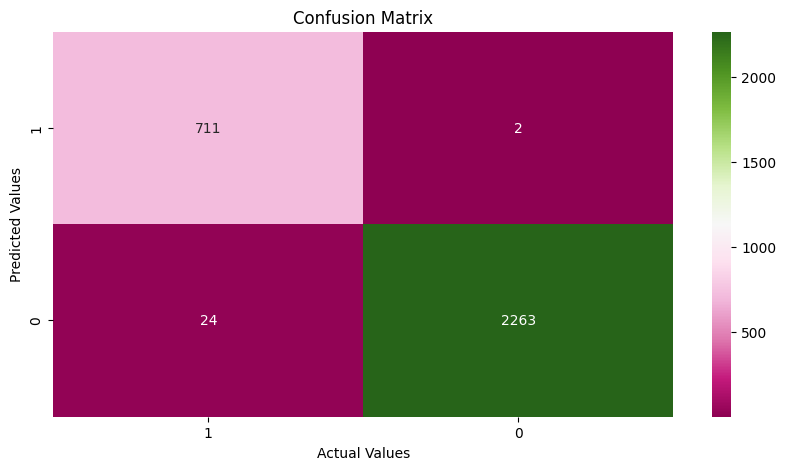

In [33]:
model = RandomForestClassifier(n_estimators = 90)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
tn, fp , fn, tp = confusion_matrix(y_test, y_pred).ravel()

plt.figure(figsize = (10,5))
sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0], yticklabels = [1,0],
            fmt='d',annot = True,cmap="PiYG")
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

In [34]:
classifier = RandomForestClassifier(n_estimators=90)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [40]:
import pickle

In [41]:
filename = 'trained_model.EA'
pickle.dump(classifier, open(filename, 'wb'))

In [42]:
loaded_model = pickle.load(open("trained_model.EA", 'rb'))

####*Testing*

In [43]:
input_data = [0.38,	0.53,	2,	157,	3,	0,	1,	1, 7]
np_array = np.asarray(input_data)
np_array = np_array.reshape(1, -1)

In [44]:
prediction = loaded_model.predict(np_array)
if prediction == 0:
  print("The employee is predicted to not leave the company (not attrited).")
else:
  print("The employee is predicted to leave the company (attrited).")

The employee is predicted to leave the company (attrited).
